The country with most attacks is: USA
The state with most attacks is: Florida
The activity in which most attacks occurs is: Surfing
Top 10 combinaciones país-estado-actividad más frecuentes:
country       state                  activity
USA           Florida                Surfing     376
                                     Swimming    149
AUSTRALIA     New South Wales        Surfing     118
USA           California             Surfing      84
              Florida                Wading       76
AUSTRALIA     New South Wales        Swimming     72
USA           Hawaii                 Surfing      71
SOUTH AFRICA  Eastern Cape Province  Surfing      58
AUSTRALIA     Queensland             Swimming     58
USA           Florida                Fishing      46
dtype: int64


C:\Users\rafa\AppData\Local\Temp\ipykernel_3280\2244665693.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_year'] = df_filtered['date'].dt.to_period('M').astype(str)


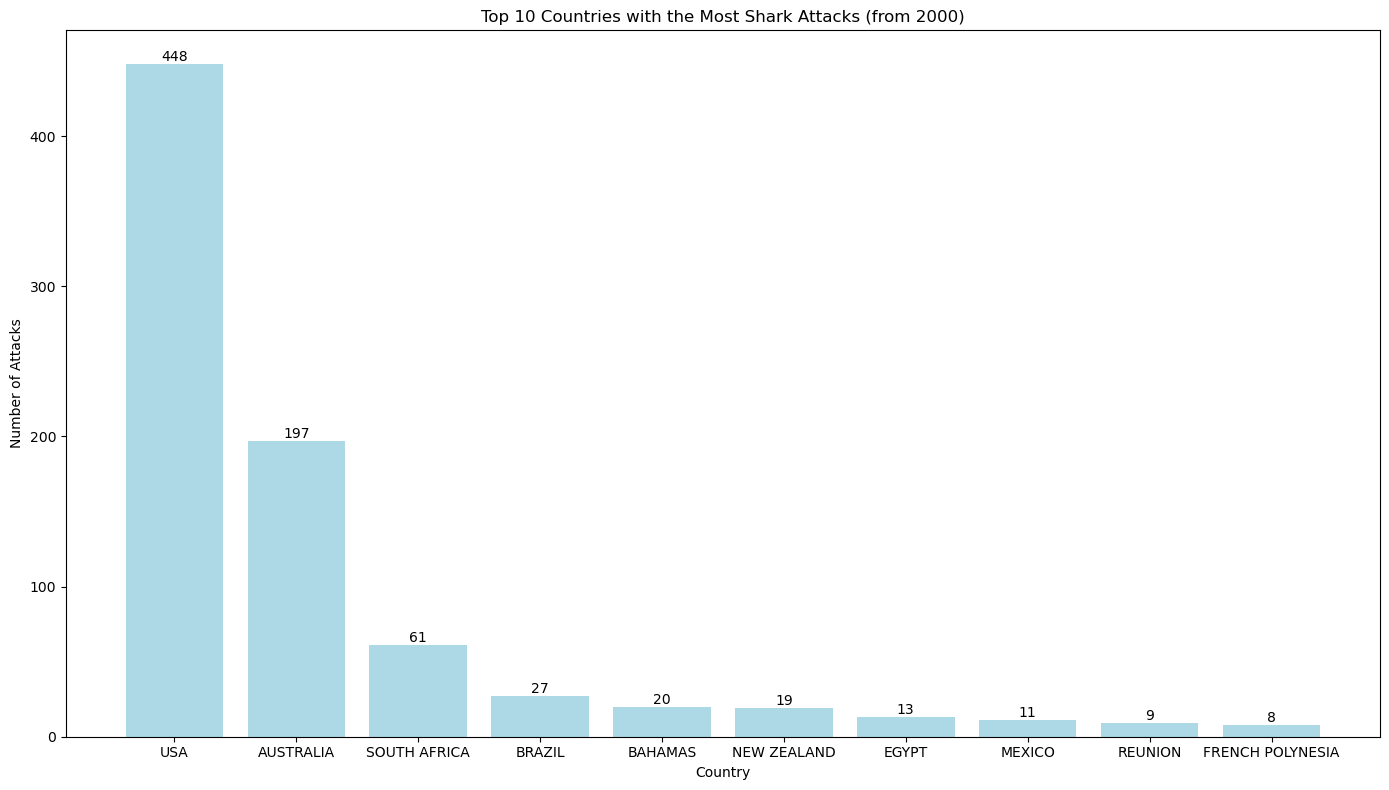

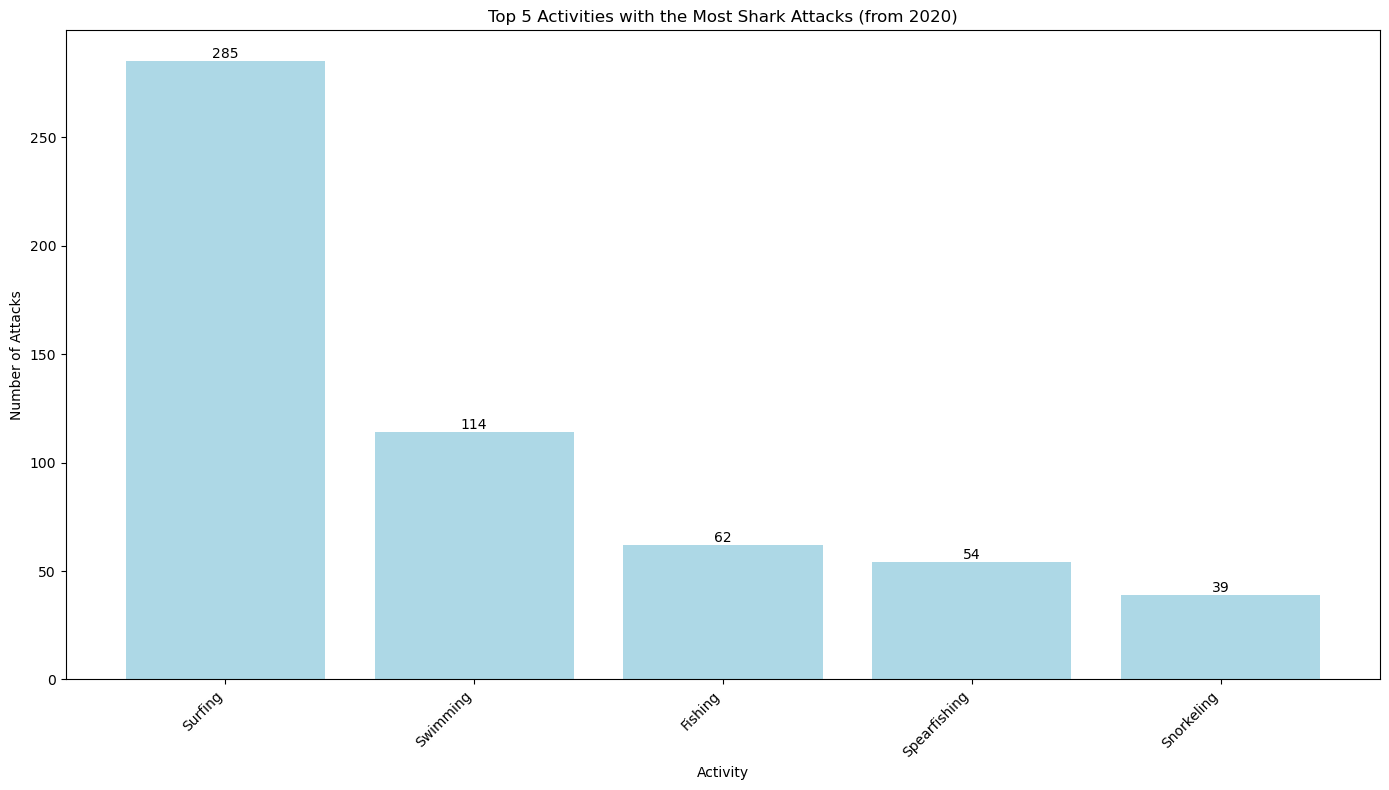

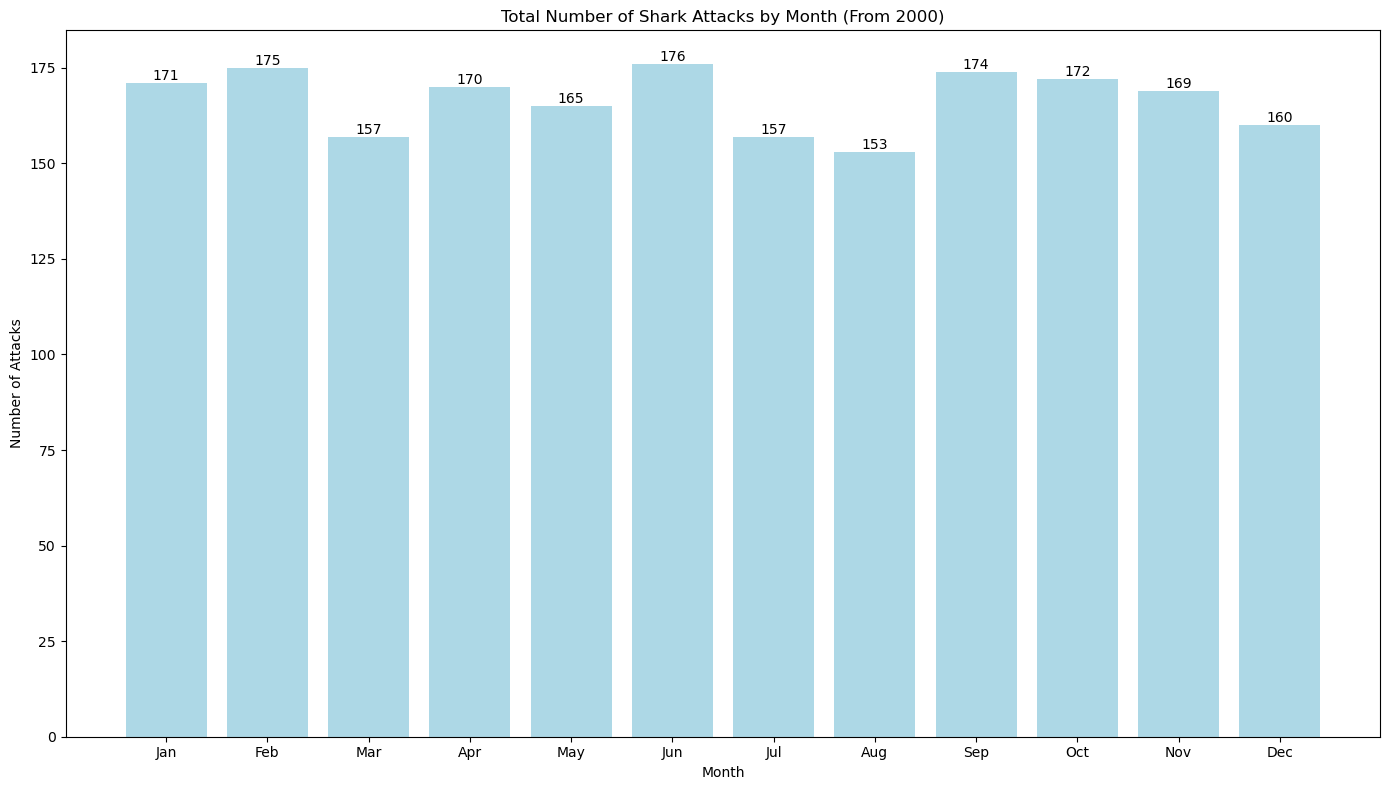

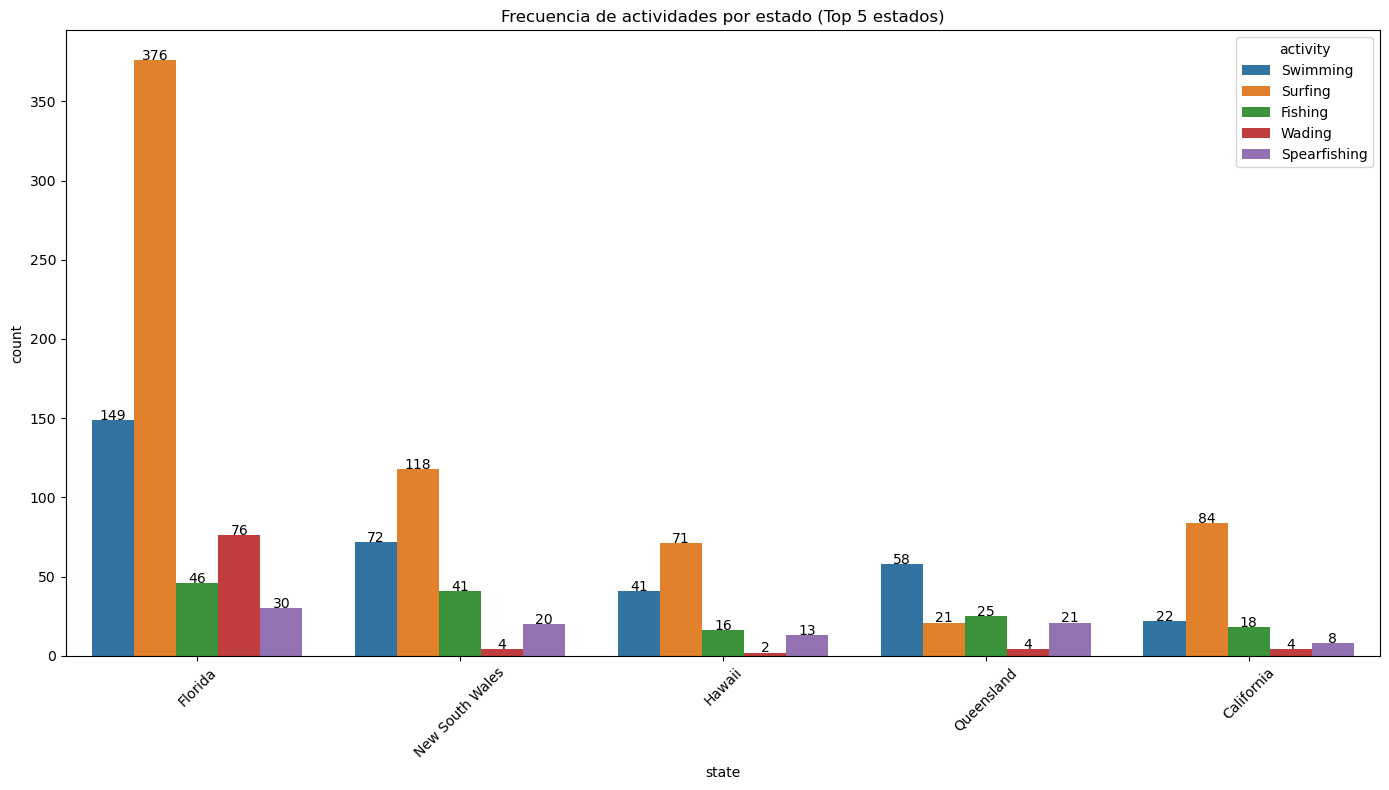

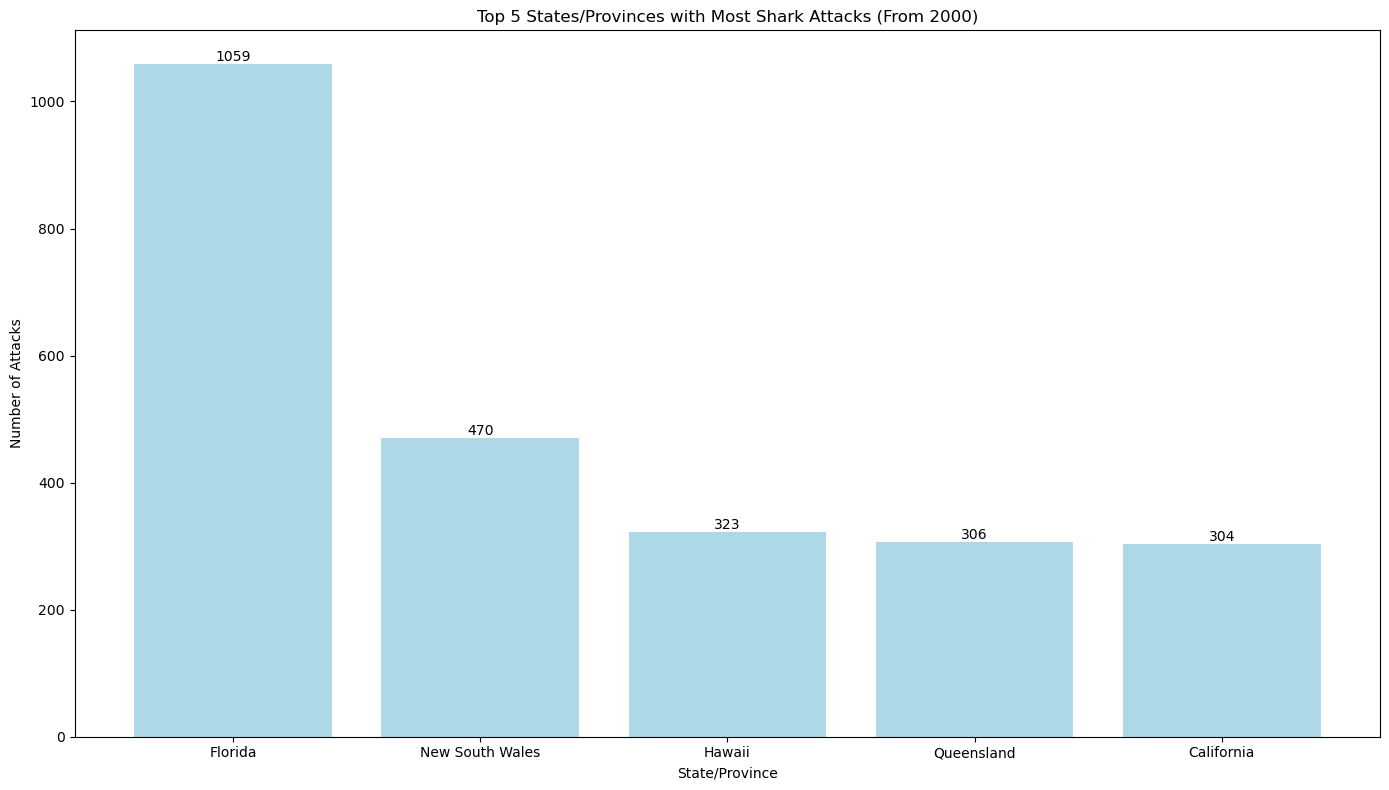

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame y filtrar como en tu código anterior
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)

# Eliminar columnas innecesarias
def delete_columns(df):
    df_dropped_multiple = df.drop(['Year', 'Type', 'Location', 'Name', 'Sex', 'Age', 'Injury',
                                   'Unnamed: 11', 'Time', 'Species ', 'Source', 'pdf', 'href formula',
                                   'href', 'Case Number', 'Case Number.1', 'original order',
                                   'Unnamed: 21', 'Unnamed: 22'], axis=1)
    return df_dropped_multiple

df = delete_columns(df)

# Limpiar datos
def clean_data(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.drop_duplicates(inplace=True)
    df = df.dropna()
    return df

df= clean_data(df)
def get_mode_of_attacks(df):
    """
    Función para obtener los valores más frecuentes (moda) de los ataques de tiburón
    por país, estado y actividad.

    Parámetros:
    df (DataFrame): DataFrame que contiene los datos de ataques.

    Retorna:
    dict: Diccionario con los valores más frecuentes para país, estado y actividad.
    """
    moda_country = df['country'].mode()[0]
    moda_state = df['state'].mode()[0]
    moda_activity = df['activity'].mode()[0]

    return {
        'most_attacked_country': moda_country,
        'most_attacked_state': moda_state,
        'most_common_activity': moda_activity
    }
    
result = get_mode_of_attacks(df)
print(f"The country with most attacks is: {result['most_attacked_country']}")
print(f"The state with most attacks is: {result['most_attacked_state']}")
print(f"The activity in which most attacks occurs is: {result['most_common_activity']}")

def top_country_state_activity(df, n=10):
 
    
    country_state_activity = df.groupby(['country', 'state', 'activity']).size().sort_values(ascending=False).head(n)
    print(f"Top {n} combinaciones país-estado-actividad más frecuentes:")
    return country_state_activity

top_activities = top_country_state_activity(df, 10)
print(top_activities)
# Remover el prefijo "Reported " y corregir formato de fechas
def remove_prefix(date):
    if isinstance(date, str) and date.startswith("Reported "):
        return date[len("Reported "):]
    return date

def fix_format_date(date):
    if isinstance(date, str):
        try:
            correct_date_format = pd.to_datetime(date, format='%d-%b-%Y', errors='coerce')
            return correct_date_format.strftime('%d-%m-%Y') if correct_date_format else None
        except ValueError:
            return None
    return None

df['date'] = df['date'].apply(remove_prefix)
df['date'] = df['date'].apply(fix_format_date)

# Filtrar desde 2020
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_filtered = df[df['date'] >= pd.to_datetime('2000-01-01')]

# Crear nueva columna de mes/año para agrupar
df_filtered['month_year'] = df_filtered['date'].dt.to_period('M').astype(str)
attacks_grouped = df_filtered.groupby(['country', 'state', 'activity', 'month_year']).size().reset_index(name='count')
# Contar el número de ataques por mes
attacks_per_country = df_filtered.groupby('country').size().reset_index(name='count')

top_20_countries = attacks_per_country.sort_values(by='count', ascending=False).head(10)

# Graficar los ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_countries['country'], top_20_countries['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with the Most Shark Attacks (from 2000)')
plt.gca().invert_xaxis # Invertir el eje Y para que el país con más ataques esté arriba
plt.tight_layout()
plt.show()

attacks_per_activity = df_filtered.groupby('activity').size().reset_index(name='count')

# Ordenar las actividades por la cantidad de ataques en orden descendente y seleccionar las 5 primeras
top_5_activities = attacks_per_activity.sort_values(by='count', ascending=False).head(5)

# Crear un gráfico de barras con las 5 actividades con más ataques
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_activities['activity'], top_5_activities['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 5 Activities with the Most Shark Attacks (from 2020)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()



# Graficar los ataques por mes


df['month'] = df['date'].dt.month

# Agrupar por mes y contar los ataques
attacks_per_month = df.groupby('month').size().reset_index(name='count')

# Crear un gráfico de barras de ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(attacks_per_month['month'], attacks_per_month['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Total Number of Shark Attacks by Month (From 2000)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

top_states = df['state'].value_counts().head(5).index
# Filtrar por esos estados y graficar las actividades
filtered_data = df[df['state'].isin(top_states)]
# Seleccionar las actividades con más ataques
top_activities = df['activity'].value_counts().head(5).index
# Filtrar por esas actividades
filtered_data = df[df['activity'].isin(top_activities)]
# Crear un gráfico de barras apiladas
 #Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
barplot = sns.countplot(data=filtered_data, x='state', hue='activity', order=top_states)

# Añadir los números sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Solo añadir texto si la altura es mayor que cero
        barplot.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), ha="center")

# Ajustar el gráfico
plt.title('Frecuencia de actividades por estado (Top 5 estados)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


attacks_per_state = df.groupby('state').size().reset_index(name='count')

# Obtener los 5 estados/provincias con más ataques
top_5_states = attacks_per_state.sort_values(by='count', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_states['state'], top_5_states['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('State/Province')
plt.ylabel('Number of Attacks')
plt.title('Top 5 States/Provinces with Most Shark Attacks (From 2000)')
plt.tight_layout()
plt.show()

Top 10 combinaciones país-estado-actividad más frecuentes:


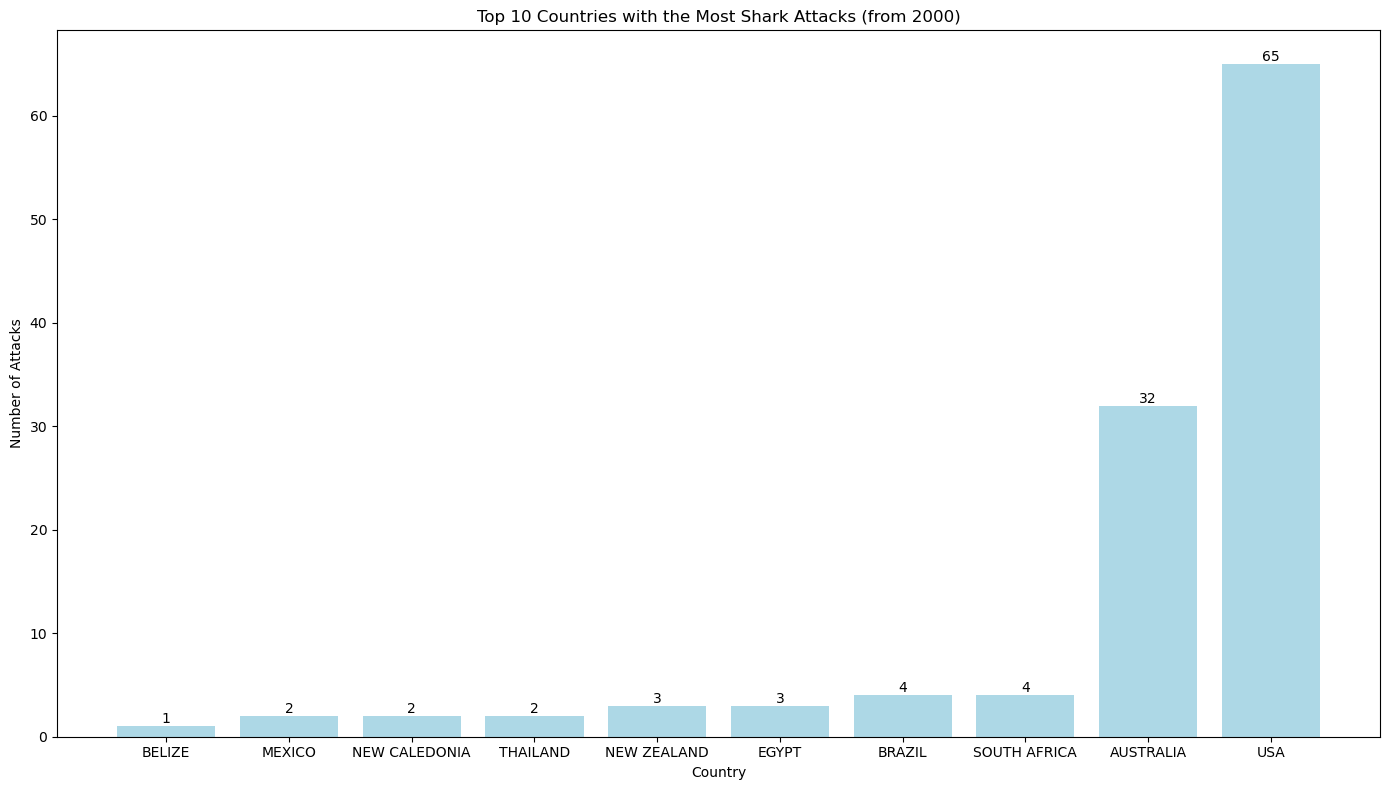

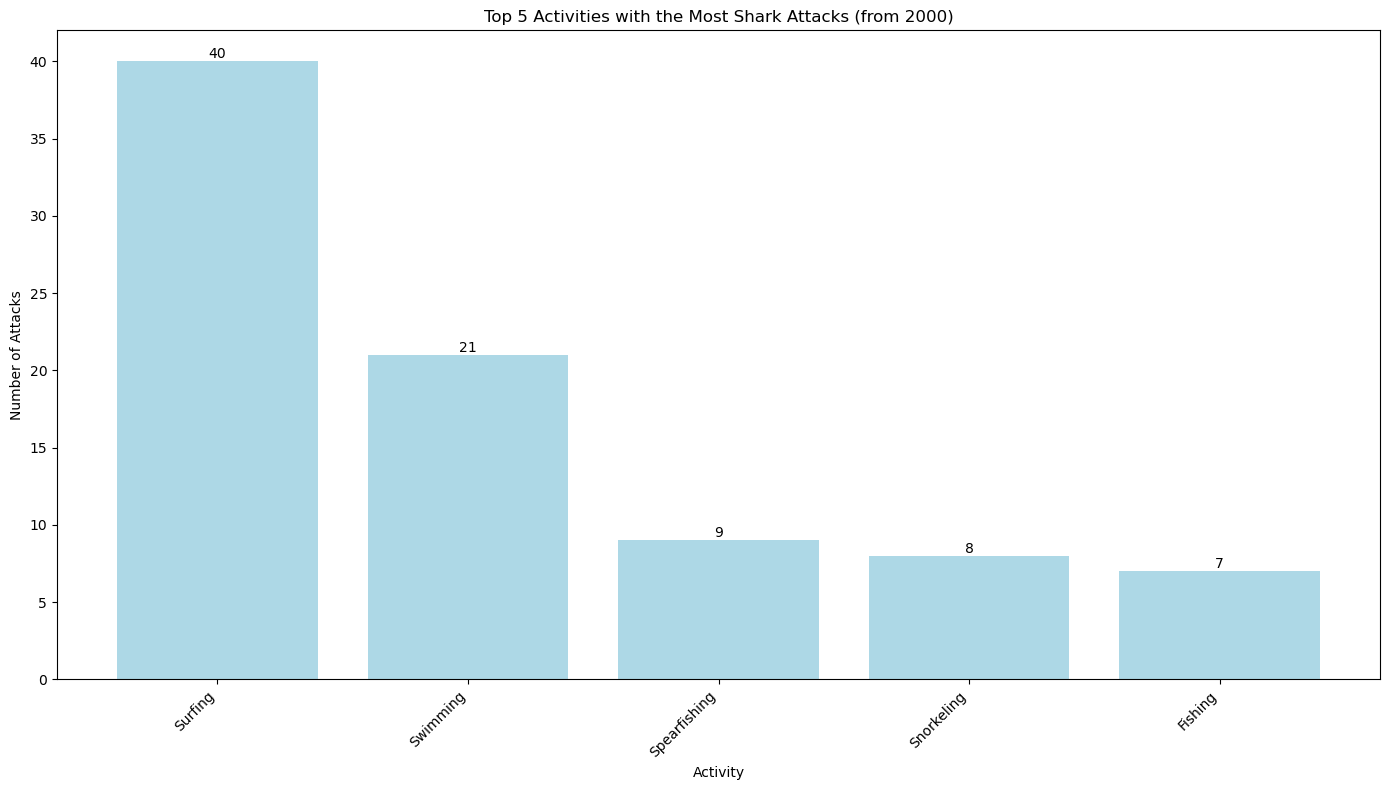

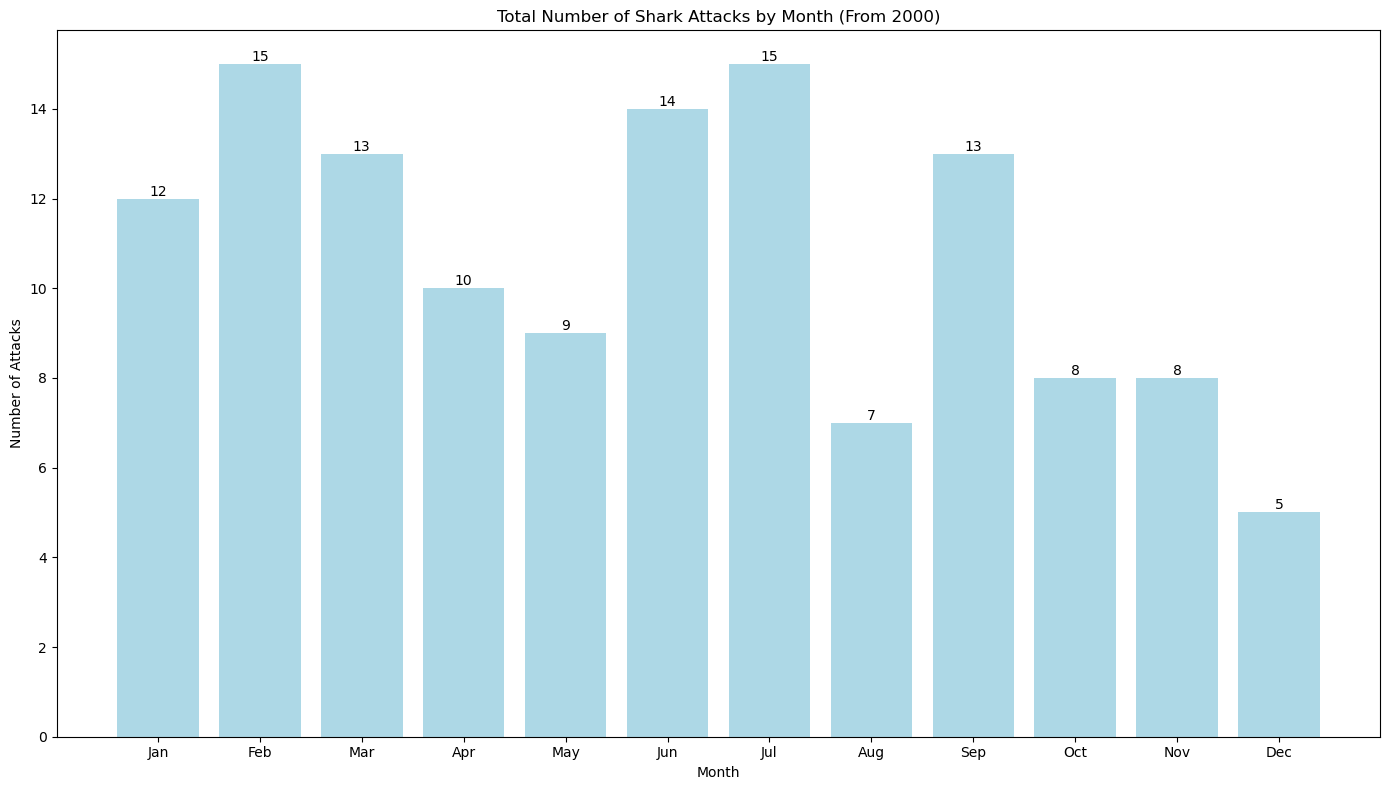

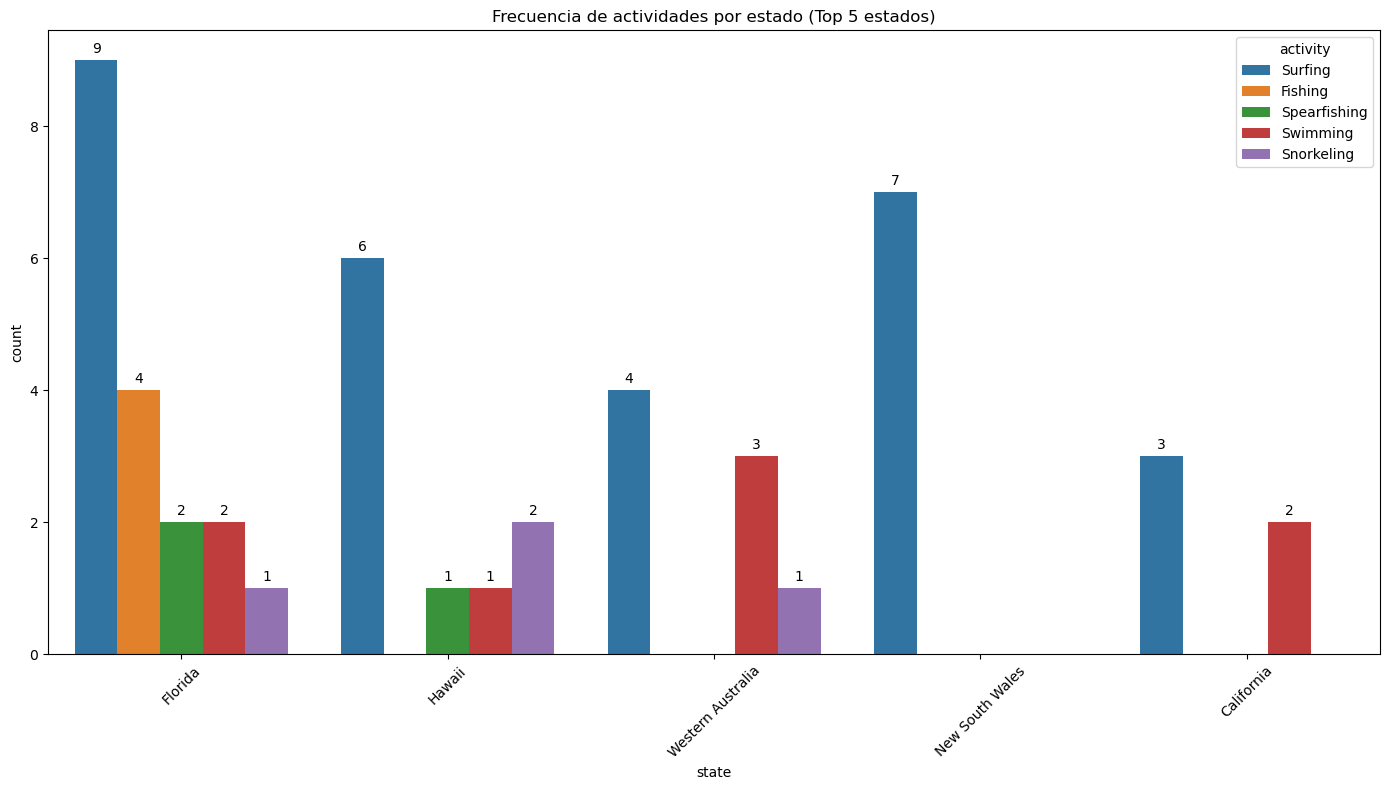

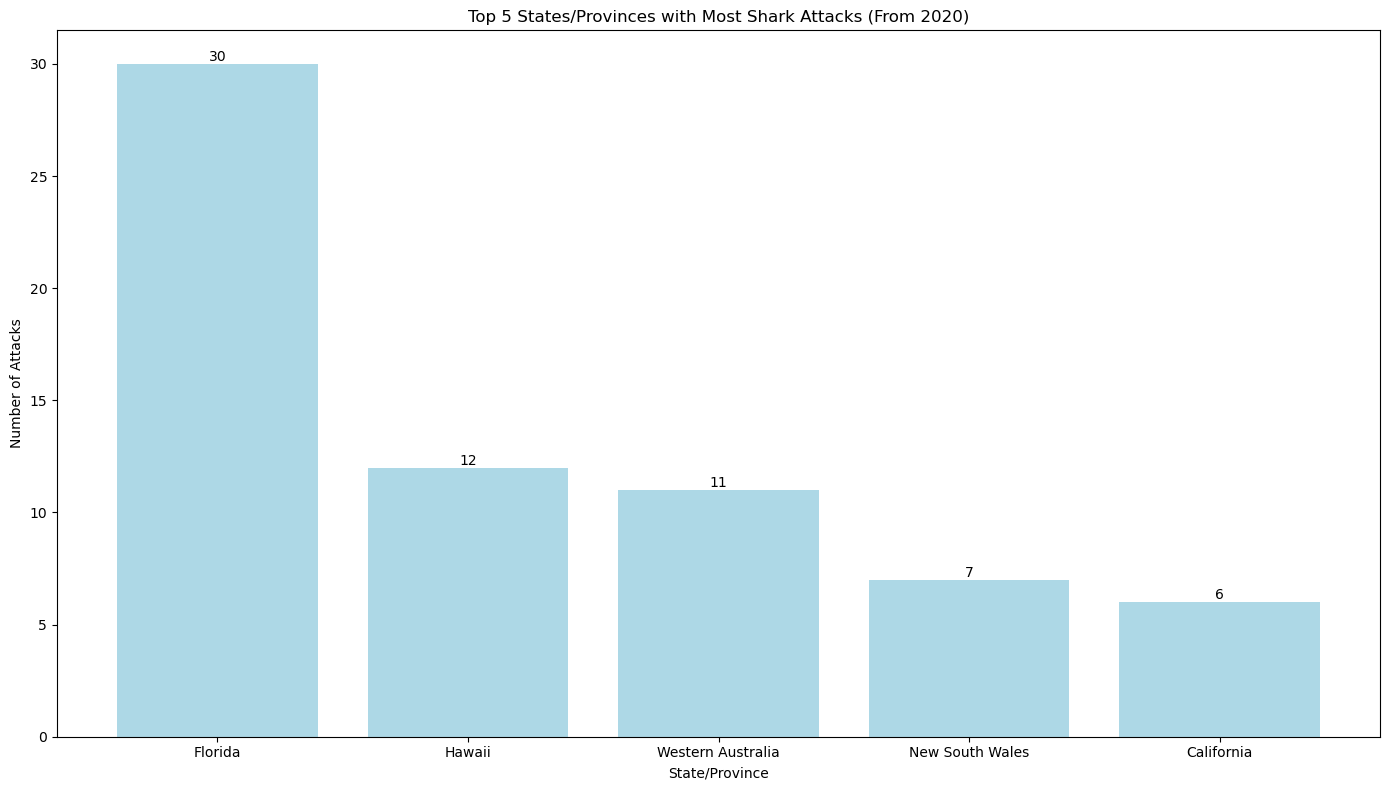

          date       country                  state  \
8   2024-09-01     AUSTRALIA        South Australia   
9   2024-05-01  SOUTH AFRICA  Eastern Cape Province   
74  2023-07-06       BAHAMAS               Freeport   
84  2023-11-05           USA                Florida   
85  2023-11-05           USA                 Hawaii   
..         ...           ...                    ...   
415 2020-05-02           USA                   Maui   
421 2020-12-01      THAILAND     Phang Nga Province   
422 2020-07-01     AUSTRALIA             Queensland   
423 2020-05-01     AUSTRALIA      Western Australia   
425 2020-02-01     AUSTRALIA      Western Australia   

                                 activity  month  
8                                 Surfing      9  
9                                 Fishing      5  
74                           Scuba diving      7  
84                                Sitting     11  
85                          Kayak fishing     11  
..                               

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning import*
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

df = pd.read_excel(url)

df = delete_columns(df)
df= clean_data(df)
df['date'] = df['date'].apply(remove_prefix)
df['date'] = df['date'].apply(fix_format_date)
result = get_mode_of_attacks(df)
df = filter_date(df)
top_activities = top_country_state_activity(df, 10)





# Filtrar desde 2020
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_filtered = df[df['date'] >= pd.to_datetime('2000-01-01')]

# Crear nueva columna de mes/año para agrupar
df_filtered['month_year'] = df_filtered['date'].dt.to_period('M').astype(str)
attacks_grouped = df_filtered.groupby(['country', 'state', 'activity', 'month_year']).size().reset_index(name='count')
# Contar el número de ataques por mes
attacks_per_country = df_filtered.groupby('country').size().reset_index(name='count')

top_20_countries = attacks_per_country.sort_values(by='count', ascending=False).head(10)

# Graficar los ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_countries['country'], top_20_countries['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with the Most Shark Attacks (from 2000)')
plt.gca().invert_xaxis() # Invertir el eje Y para que el país con más ataques esté arriba
plt.tight_layout()
plt.show()

attacks_per_activity = df_filtered.groupby('activity').size().reset_index(name='count')

# Ordenar las actividades por la cantidad de ataques en orden descendente y seleccionar las 5 primeras
top_5_activities = attacks_per_activity.sort_values(by='count', ascending=False).head(5)

# Crear un gráfico de barras con las 5 actividades con más ataques
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_activities['activity'], top_5_activities['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 5 Activities with the Most Shark Attacks (from 2000)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()



# Graficar los ataques por mes


df['month'] = df['date'].dt.month

# Agrupar por mes y contar los ataques
attacks_per_month = df.groupby('month').size().reset_index(name='count')

# Crear un gráfico de barras de ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(attacks_per_month['month'], attacks_per_month['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Total Number of Shark Attacks by Month (From 2000)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

top_states = df['state'].value_counts().head(5).index
# Filtrar por esos estados y graficar las actividades
filtered_data = df[df['state'].isin(top_states)]
# Seleccionar las actividades con más ataques
top_activities = df['activity'].value_counts().head(5).index
# Filtrar por esas actividades
filtered_data = df[df['activity'].isin(top_activities)]
# Crear un gráfico de barras apiladas
 #Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
barplot = sns.countplot(data=filtered_data, x='state', hue='activity', order=top_states)

# Añadir los números sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Solo añadir texto si la altura es mayor que cero
        barplot.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), ha="center")

# Ajustar el gráfico
plt.title('Frecuencia de actividades por estado (Top 5 estados)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


attacks_per_state = df.groupby('state').size().reset_index(name='count')

# Obtener los 5 estados/provincias con más ataques
top_5_states = attacks_per_state.sort_values(by='count', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_states['state'], top_5_states['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('State/Province')
plt.ylabel('Number of Attacks')
plt.title('Top 5 States/Provinces with Most Shark Attacks (From 2020)')
plt.tight_layout()
plt.show()

print(df)

In [18]:
df.head()


,date,country,state,activity,month
0,NaT,AUSTRALIA,Queensland,Swimming,NaN
1,NaT,USA,Hawaii,Surfing,NaN
2,NaT,USA,Hawaii,Swimming,NaN
4,NaT,INDIA,Maharashtra,Fishing,NaN
6,NaT,AUSTRALIA,New South Wales,Swimming,NaN
